In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT.disableJSVis() 

## Fit a Gaussian function

In [3]:
# parameters

# Observable
x = ROOT.RooRealVar("x", "x", -20, 20)

# Unknowns
mean = ROOT.RooRealVar("#mu", "#mu", 0, -10, 10)
sigma_g1 = ROOT.RooRealVar("#sigma", "#mu", 5,1,10)

#construct the model
pdf = ROOT.RooGaussian('PDF','PDF',x,mean,sigma_g1)

# the obseravle / observables you want want generate samples over.
data = pdf.generate({x},1000)

#fit the data
result = pdf.fitTo(data,Save=True)

[#1] INFO:Fitting -- RooAbsPdf::fitTo(PDF_over_PDF_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_PDF_over_PDF_Int[x]_PDFData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3065.41238092439198
Edm   = 3.9988839651782546e-07
Nfcn  = 32
#mu	  = 0.134387	 +/-  0.164396	(limited)
#sigma	  = 5.19405	 +/-  0.116991	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =        3067.24104 Edm =       1.769772102 NCalls =      9
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 3067.24104
  Edm           : 1.769772102
  Internal parameters:	[                0    -0.1113410143]	
  Internal gradient  :	[     -53.60281678     -70.59508884]	
  Internal covariance matrix:
[[  0.00050053603              0]
 [              0    0.001131881]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =        3067.24104 Edm =       1.769772102 NCalls =      9
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       3065.420718 Edm =    0.007016309094 NCalls =     14
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       3065.412381 Edm =   3.723637857e-07 NCalls =     20
Info in <Minuit2>: VariableMetri

In [4]:
# print the result 
result.Print()
# Check the status code. 0 is good!


  RooFitResult: minimized FCN value: 3065.41, estimated distance to minimum: 4.00101e-07
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                   #mu    1.3439e-01 +/-  1.64e-01
                #sigma    5.1940e+00 +/-  1.17e-01



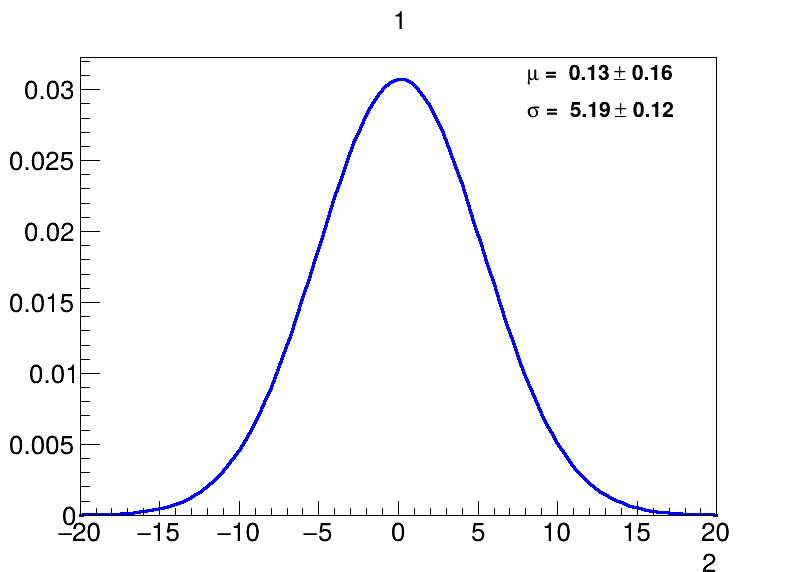

In [5]:
# make a frame from the variable of inerest.
frame = x.frame()

# RooFit is scales your PDF to match the data.
# data.plotOn(frame)
# show the pdf
pdf.plotOn(frame)
# show fit parameters
pdf.paramOn(frame)

# adjust labels
frame.SetTitle('1;2;3')
# adjust the x and y title size.(fraction of the frame size)
frame.SetTitleSize(0.05,'xy')
# adjust the size of the number on the axis.(fraction of the frame size)
frame.SetLabelSize(0.05,'xy')


# make a ROOT cavnas with a size.
c = ROOT.TCanvas('test','test',800,600)
# draw the frame on canvas
frame.Draw()
# draw the canvas
c.Draw()

## If you plot the data first, the PDF will be rescaled

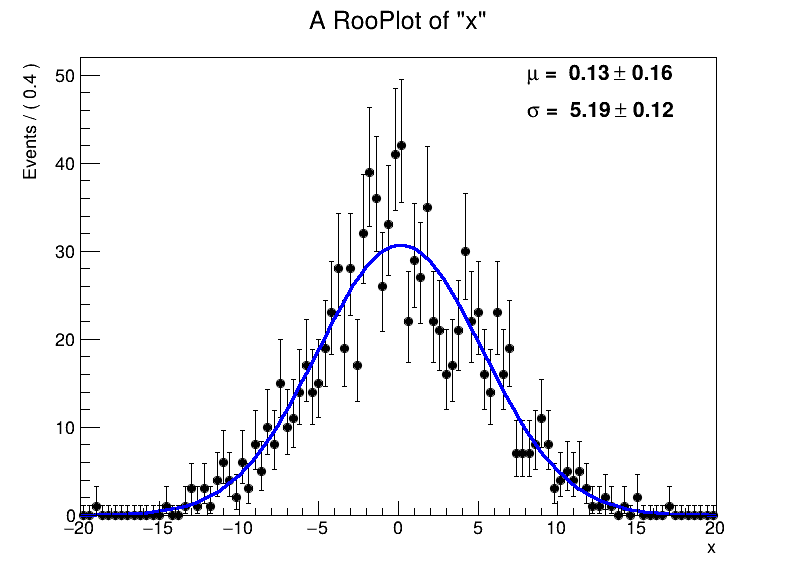

In [6]:
# make a frame from the variable of inerest.
frame = x.frame()

# show the data
data.plotOn(frame)
# show the pdf
pdf.plotOn(frame)
# show fit parameters
pdf.paramOn(frame)

del c
# make a ROOT cavnas with a size.
c = ROOT.TCanvas('test','test',800,600)
# draw the frame on canvas
frame.Draw()
# draw the canvas
c.Draw()

In [7]:
# make a frame
def make_frame(obs, *objects):
    frame = obs.frame()
    for obj in objects:
        obj.plotOn(frame)
    return frame

# draw a frame
def make_plot(frame):
    c = ROOT.TCanvas()
    frame.Draw()
    c.Draw()
    # need this for the plot not to be removed!
    ROOT.SetOwnership(c, False )
    del c

## Access the NLL and manually tune the fit.

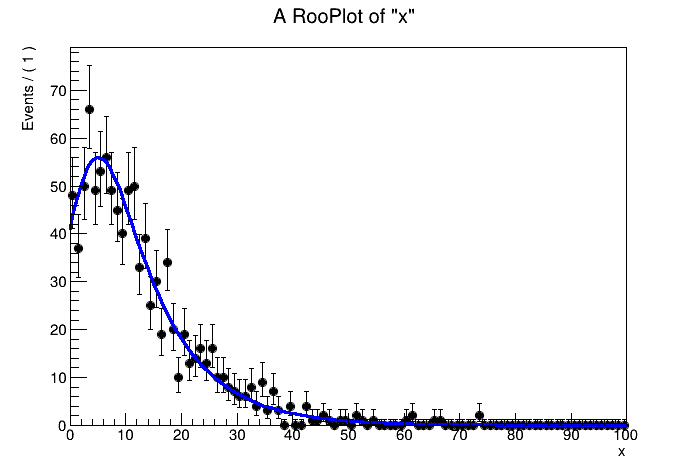

In [8]:
# parameters

# Observable
x = ROOT.RooRealVar("x", "x", 0., 100.)

# parameters to define a resolution model
sigma = ROOT.RooRealVar("#sigma", "#mu", 5.,1.,10.)
mean = ROOT.RooRealVar("#mu", "#mu", 0., -10., 10.)
resolution_model = ROOT.RooGaussModel('Resolution_model','Resolution_model',x,mean,sigma)

# A smeared exponential function
decay = ROOT.RooRealVar("#lambda", "#lambda", 10.,0.01,20.)
pdf = ROOT.RooDecay('decay','decay',x,decay,resolution_model,ROOT.RooDecay.SingleSided)

# the obseravle / observables you want want generate samples over.
data = pdf.generate({x},1000)

frame = make_frame(x,data,pdf)
make_plot(frame)


# Make NLL and minimize this

[#1] INFO:Fitting -- RooAbsPdf::fitTo(Resolution_model_conv_exp(-@0/@1)_x_#lambda_[decay]_over_Resolution_model_conv_exp(-@0/@1)_x_#lambda_[decay]_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_Resolution_model_conv_exp(-@0/@1)_x_#lambda_[decay]_over_Resolution_model_conv_exp(-@0/@1)_x_#lambda_[decay]_Int[x]_decayData) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3512.94890864977197
Edm   = 6.36066916100096242e-06
Nfcn  = 62
#lambda	  = 10.3161	 +/-  0.532756	(limited)
#mu	  = -0.208108	 +/-  1.05432	(limited)
#sigma	  = 5.2998	 +/-  1.23803	(limited)


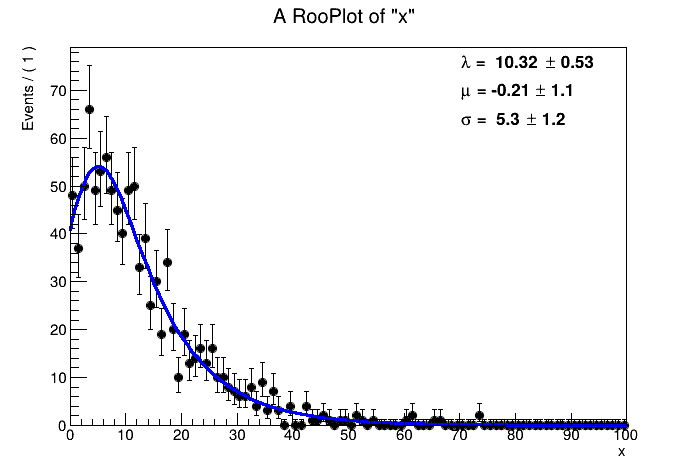

In [9]:
# Initialize the NLL for this data
nll = pdf.createNLL(data)

# Initialize the minimizer for the NLL
m = ROOT.RooMinimizer(nll)

# choose the minimization package. I'd suggest Minuit2, check the documentation for full detail.
m.setMinimizerType('Minuit2')
# Set the verbosity of the output. Increase it to see what the minimizer is doing 0, 1, 2.
m.setPrintLevel(0)
# minimization strategy(default = 1). Option 2 is more time consuming and may perform worse.
m.setStrategy(1)

# Initial minimization
m.migrad()
# better calculation of error. (Not the best approach, we didn't cover this in the slides.)
m.hesse()

frame = make_frame(x,data,pdf)
pdf.paramOn(frame)
make_plot(frame)


# Plot the NLL

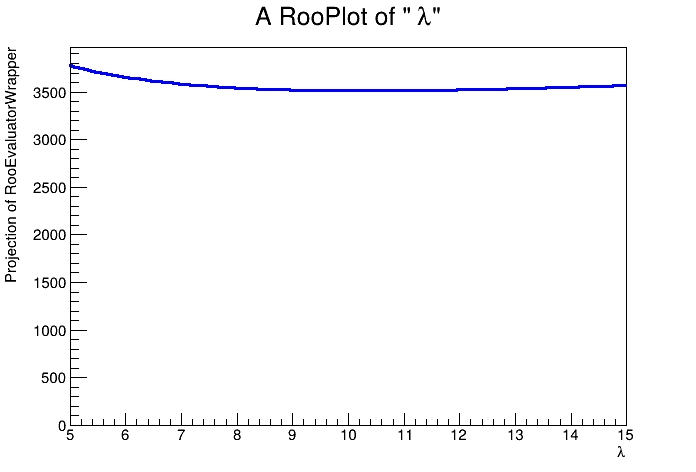

In [10]:
# NLL behaves as a PDF.
# It depends on unknowns.
# Let's plot a section of it.

# you can also set the range of the fit.
frame = decay.frame(Range=(5,15))
nll.plotOn(frame)
make_plot(frame)

# It looks ugly. NLL doesn't start from zero! (It's not Likelihood ratio)
# You can zero it.

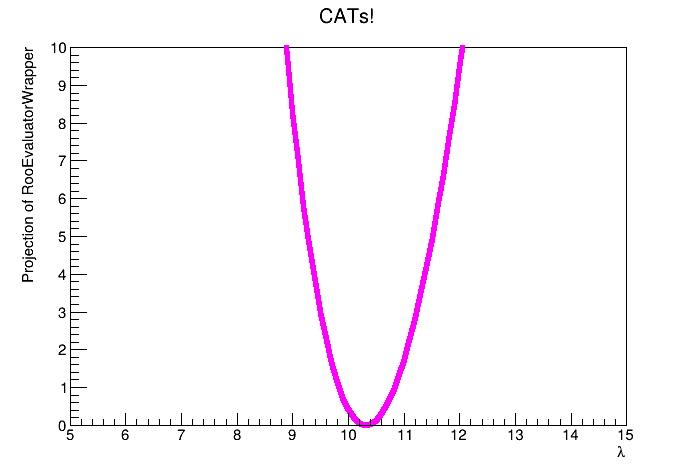

In [11]:
frame = decay.frame(Title='CATs!',     #you can also choose a title
                    Range=(5,15))


nll.plotOn(frame, 
           ShiftToZero=True, # zero the line
           LineWidth=5, # Set the line width on the plot
           LineColor=ROOT.kMagenta # Set a line color
          )

frame.SetMaximum(10)
frame.SetMinimum(0)

make_plot(frame)


# Show the model structure

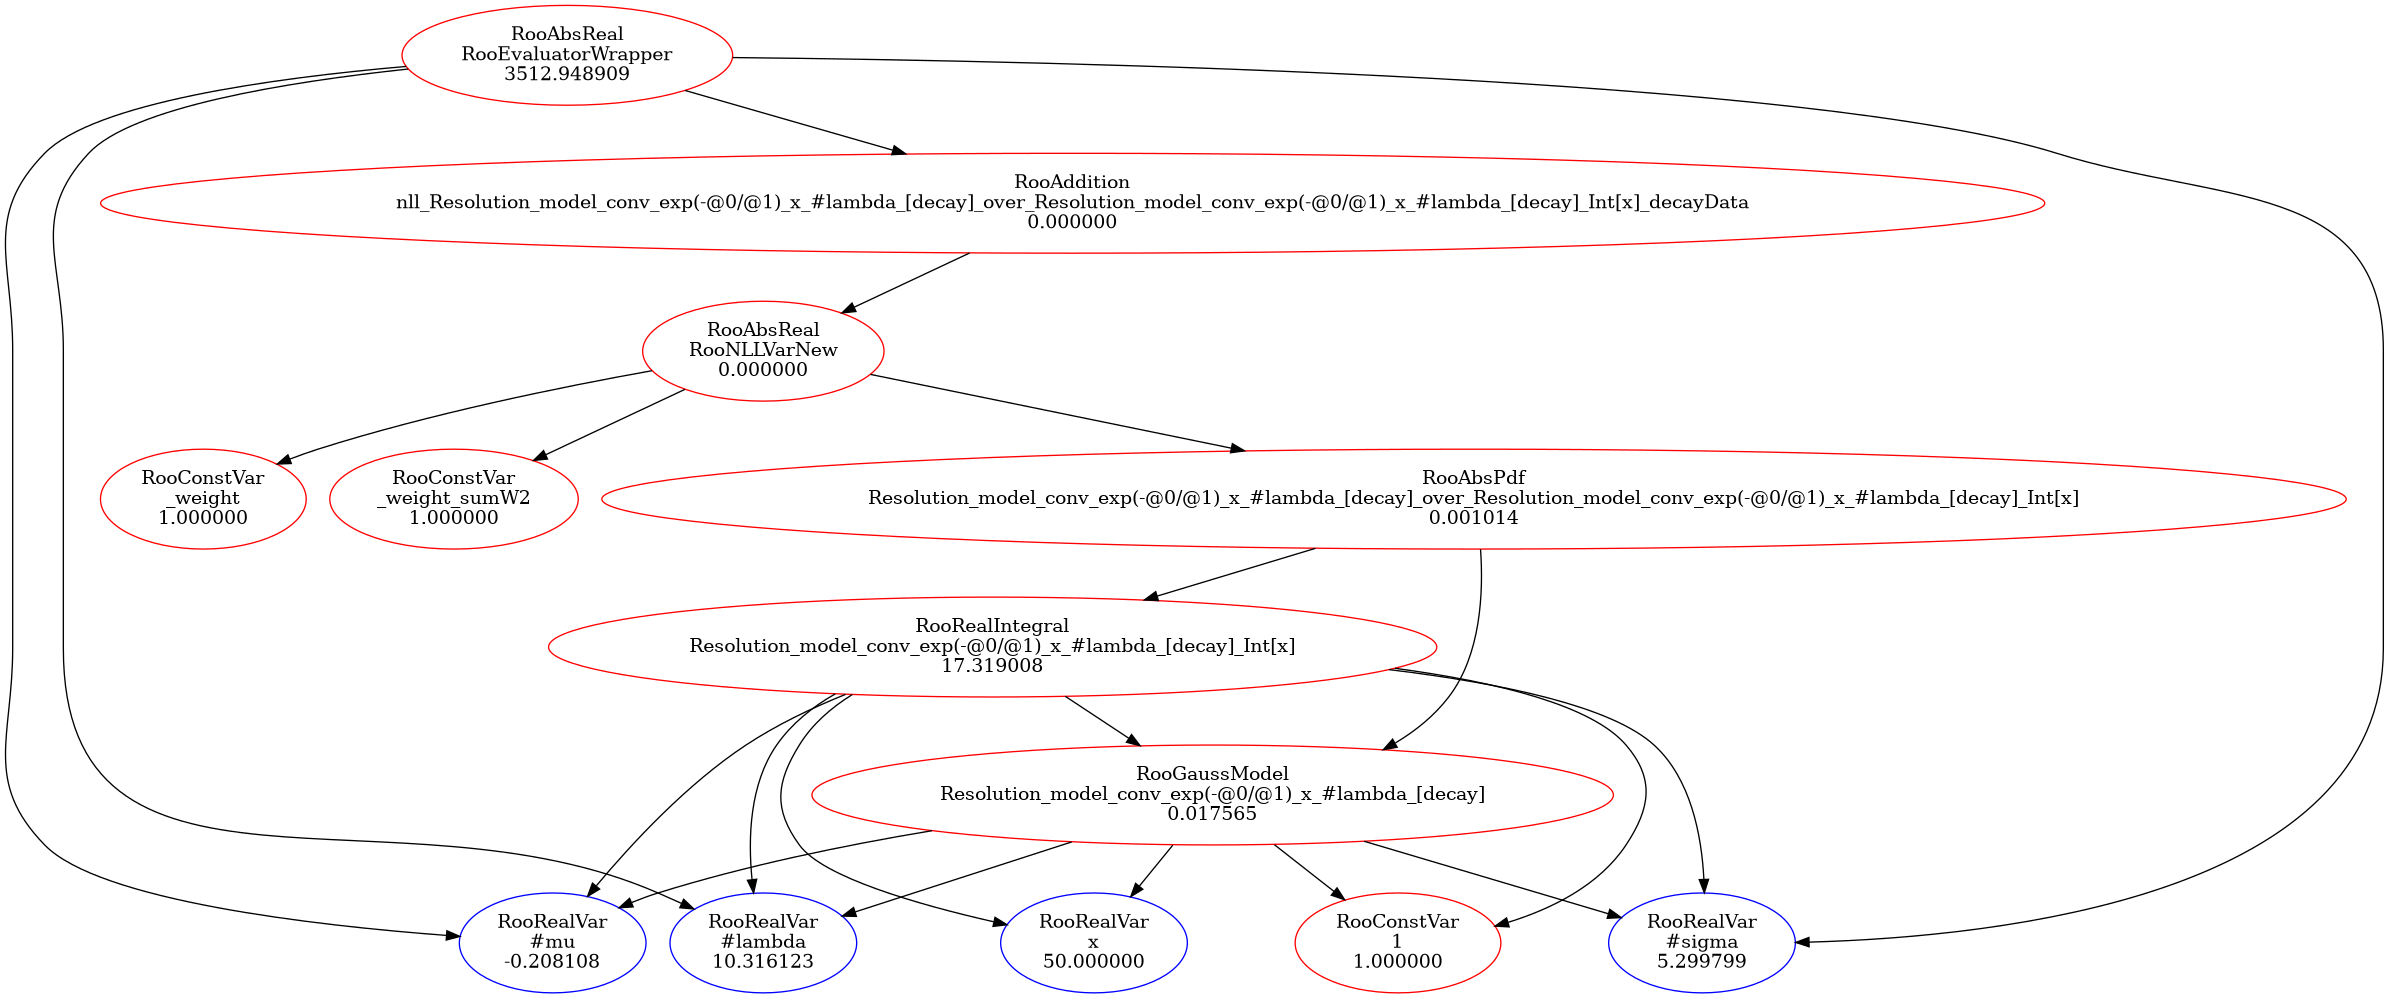

In [12]:
# Let's see the structure of the model.
# This command produces a .dot file that can be visualized.
nll.graphVizTree('total_nll.dot')

# don't care about this part for know
!dot -Tpng total_nll.dot -o file.png 
!unflatten  -l 1 total_nll.dot | dot -Tpng -o file.png #number of of layers

from IPython.display import Image
Image(filename='file.png')

#  Perform an extended fit

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(extended_pdf) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_extended_pdf_extended_pdfData) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -2873.16524978107054
Edm   = 2.27461678931137389e-07
Nfcn  = 50
#lambda	  = 1000	 +/-  31.6222	(limited)
#mu	  = 0.206825	 +/-  0.159295	(limited)
#sigma	  = 5.03454	 +/-  0.113133	(limited)


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -2872.264561 Edm =      0.9122566179 NCalls =     15
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : -2872.264561
  Edm           : 0.9122566179
  Internal parameters:	[     -0.927295218                0    -0.1113410143]	
  Internal gradient  :	[ -0.0004566135545     -82.58872556     -13.79834577]	
  Internal covariance matrix:
[[   0.0002222222              0              0]
 [              0  0.00050053602              0]
 [              0              0   0.0012338682]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =      -2872.264561 Edm =      0.9122566179 NCalls =     15
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       -2873.16476 Edm =   0.0004708769806 NCalls =     22
Info in <Minuit2>: VariableM

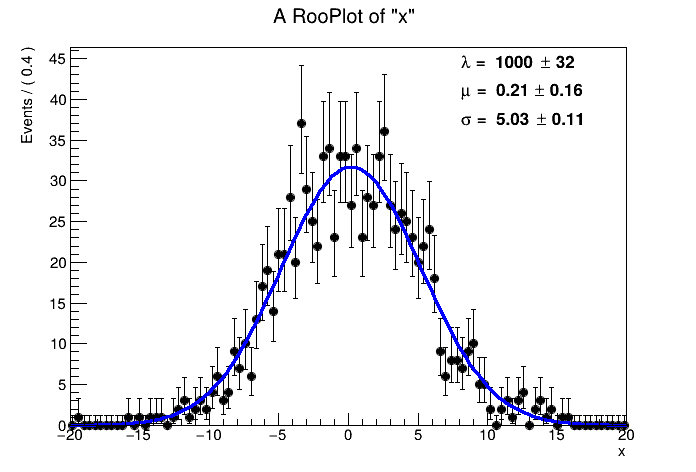

In [13]:
# parameters

# Observable
x = ROOT.RooRealVar("x", "x", -20, 20)

# Unknowns
mean = ROOT.RooRealVar("#mu", "#mu", 0, -10, 10)
sigma_g1 = ROOT.RooRealVar("#sigma", "#mu", 5,1,10)
#construct the model
pdf = ROOT.RooGaussian('PDF','PDF',x,mean,sigma_g1)

# The average events number to for a Poisson probability
lam = ROOT.RooRealVar("#lambda", "number of events", 1000, 0, 10000)

# This step is simply as if you multiply the original PDF with a Poisson term.
extended_pdf = ROOT.RooExtendPdf("extended_pdf", "extended PDF", pdf, lam)

# Again generate sample and fit it.
data = extended_pdf.generate({x},1000)

nll = extended_pdf.createNLL(data)
m = ROOT.RooMinimizer(nll)
m.migrad()
m.hesse()

frame = make_frame(x,data,extended_pdf)
extended_pdf.paramOn(frame)
make_plot(frame)

# Load data from numpy

Let's produce data for a gaussian function and fit it in RooFit.

In [14]:
# Parameters
mean = 0
sigma_g1 = 2

# Number of samples
n_samples = 1000

# Generate samples
samples_g = np.random.normal(mean, sigma_g1, n_samples)

In [15]:
# parameters

# Observable
x = ROOT.RooRealVar("x", "x", -20, 20)

# Unknowns
mean = ROOT.RooRealVar("#mu", "#mu", 0, -10, 10)
sigma_g1 = ROOT.RooRealVar("#sigma", "#mu", 5,1,10)

#construct the model
pdf = ROOT.RooGaussian('PDF','PDF',x,mean,sigma_g1)

# Make the data from the numpy array. Tag should match the tag of observable. 
# Parameter should also be specified.
data = ROOT.RooDataSet.from_numpy({"x": samples_g},[x],name='gauss',title='gauss')
data.Print()

RooDataSet::gauss[x] = 1000 entries


[#1] INFO:Fitting -- RooAbsPdf::fitTo(PDF_over_PDF_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_PDF_over_PDF_Int[x]_gauss) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 2107.52082923488115
Edm   = 4.06360253406777897e-07
Nfcn  = 47
#mu	  = 0.00699577	 +/-  0.0629584	(limited)
#sigma	  = 1.99093	 +/-  0.0445177	(limited)


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2607.587022 Edm =         282495.97 NCalls =      9
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 2108.078673
  Edm           : 0.5683927823
  Internal parameters:	[                0    -0.8775895634]	
  Internal gradient  :	[      -16.8333109      65.22676929]	
  Internal covariance matrix:
[[  8.3117496e-05              0]
 [              0  0.00052885235]]]
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2108.078673
  Edm           : 0.5683927823
  Internal parameters:	[                0    -0.8775895634]	
  Internal gradient  :	[      -16.8333109      65.22676929]	
  Internal covariance matrix:
[[  8.3117496e-05              0]
 [              0  0.00052885235]]]
Info i

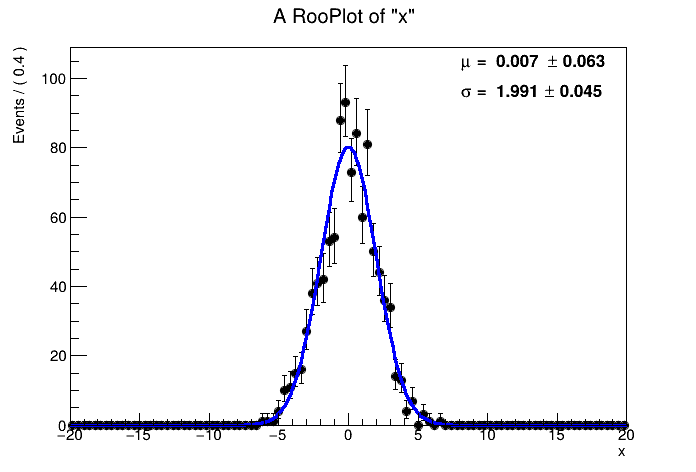

In [16]:
nll = pdf.createNLL(data)
m = ROOT.RooMinimizer(nll)
m.migrad()
m.hesse()

frame = make_frame(x,data,pdf)

pdf.paramOn(frame)
make_plot(frame)

# Let's make the model more sophisticated.
$$
model = \lambda \cdot Gauss_1(\mu,3) + (1-\lambda) \cdot Gauss_2(\mu,\sigma)
$$

In [17]:
#observable
x = ROOT.RooRealVar("x", "x", 0, -15, 15)

# mean value is the same for both.
mean = ROOT.RooRealVar("#mu", "#mu", 0, -10, 10)

# Gaussian 1
# give a single value if you want the parameter to be constant.
sigma_g1 = ROOT.RooRealVar("#sigma1", "#sigma", 3)
g1 = ROOT.RooGaussian("g1", "g1", x, mean, sigma_g1)

# Gaussian 2
sigma_g2 = ROOT.RooRealVar("#sigma2", "#sigma2", 4, 3.0, 6.0)
g2 = ROOT.RooGaussian("g2", "g2", x, mean, sigma_g2)

frac = ROOT.RooRealVar("#lambda", "#lambda", 0.5, 0.0, 1.0)

# Check the equation above. Coefficients in the sum are assigned to have a PDF finally.
pdf = ROOT.RooAddPdf("model", "model", [g1, g2], [frac])

[#0] WARNING:InputArguments -- The parameter '#sigma1' with range [-inf, inf] of the RooGaussian 'g1' exceeds the safe range of (0, inf). Advise to limit its range.


[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 5338.66287593738707
Edm   = 3.6990583249563897e-05
Nfcn  = 69
#lambda	  = 0.44185	 +/-  0.204963	(limited)
#mu	  = -0.0546843	 +/-  0.0783704	(limited)
#sigma2	  = 3.84058	 +/-  0.282205	(limited)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (g1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       5339.278567 Edm =      0.7605167648 NCalls =     13
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5339.278567
  Edm           : 0.7605167648
  Internal parameters:	[                0                0    -0.3398369095]	
  Internal gradient  :	[     -5.021306115      93.50405039      10.53963227]	
  Internal covariance matrix:
[[    0.028999052              0              0]
 [              0  0.00012399596              0]
 [              0              0    0.011043922]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5339.278567 Edm =      0.7605167648 NCalls =     13
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       5338.797368 Edm =     0.06572963247 NCalls =     21
Info in <Minuit2>: VariableMe

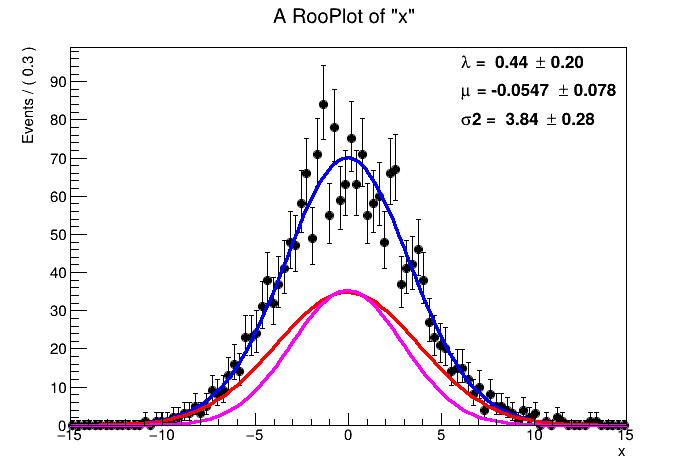

In [18]:
data = pdf.generate({x},2000)

nll = pdf.createNLL(data)
m = ROOT.RooMinimizer(nll)
m.migrad()


frame = make_frame(x,data,pdf)

# We can also plot components of the model. No need to bother with normalization.
pdf.plotOn(frame, 
           Components=f'g2', # choose a component of the model to draw using the name
           LineColor=ROOT.kRed, 
          )

pdf.plotOn(frame, 
           Components=f'g1', # choose a component of the model to draw using the name
           LineColor=ROOT.kMagenta)


pdf.paramOn(frame)
make_plot(frame)

# Compare the PLR to LR


In [19]:
# use the minos method of the minimizer object to find PLR
m.minos([frac])
results = m.save()

******************************************************************************************************
Minuit2Minimizer::GetMinosError - Run MINOS LOWER error for parameter #0 : #lambda using max-calls 1500, tolerance 1
******************************************************************************************************
Minuit2Minimizer::GetMinosError - Run MINOS UPPER error for parameter #0 : #lambda using max-calls 1500, tolerance 1
Minos: Lower error for parameter #lambda  :  -0.288731
Minos: Upper error for parameter #lambda  :  0.165677


Info in <Minuit2>: MnMinos Determination of lower Minos error for parameter 0
Info in <Minuit2>: MnFunctionCross Run Migrad with fixed parameters:
  Pos 0: #lambda = 0.236887
Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       5339.223033 Edm =      0.3685648626 NCalls =      7
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 5339.223033
  Edm           : 0.3685648626
  Internal parameters:	[  -0.004724321502    -0.6546264287]	
  Internal gradient  :	[      1.558649244     -12.45760805]	
  Internal covariance matrix:
[[  0.00012173712   -1.86136e-05]
 [   -1.86136e-05   0.0094930208]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.0005 with call limit = 1500
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       5339.223033 Edm =      0.3685648626 NCalls =      7
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =       5338.959301 Edm = 

In [20]:
# Fit values and uncertainties can be checked
mean_val = frac.getVal()
Hess_err = frac.getVal()
lower_err = frac.getErrorLo()
upper_err = frac.getErrorHi()
print(f'best_fit: {mean_val}')
print(f'Hessian error: {Hess_err}')
print(f'PLR lower: {lower_err}')
print(f'PLR upper: {upper_err}')

best_fit: 0.44185039196895565
Hessian error: 0.44185039196895565
PLR lower: -0.2887309032579026
PLR upper: 0.16567682768052513


In [21]:
# make nll we see this one before
nll = pdf.createNLL(data)
# We can also profile ll on some parameters.
pll_frac = nll.createProfile({frac})

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data


In [22]:
frame = make_frame(frac)

# Zeroing NLL serves as LR.
nll.plotOn(frame, 
           ShiftToZero=True, # zero the line
           LineWidth=5, # Set the line width on the plot
           LineColor=ROOT.kRed)

# Notice we don't need zeroing for profile likelihood.
pll_frac.plotOn(frame,
                LineWidth=5, # Set the line width on the plot
                LineColor=ROOT.kBlue)

[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[#lambda]) Creating instance of MINUIT
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[#lambda]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(RooEvaluatorWrapper_Profile[#lambda]) minimum found at (#lambda=0.441944)
....................................................................................................................................................................................................................................

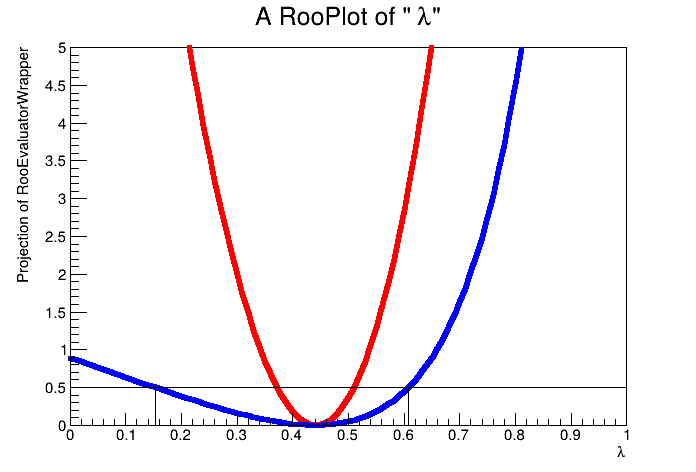

In [23]:
l = ROOT.TLine()


frame.SetMaximum(5)
frame.SetMinimum(0)
make_plot(frame)

l.DrawLine(0,0.5,1,0.5)
l.DrawLine(mean_val+lower_err,0,mean_val+lower_err,0.5)
l.DrawLine(mean_val+upper_err,0,mean_val+upper_err,0.5)


# What if we have two datasets to fit at the same time?

Imagine we take two data sets, with and without a calibration source next to the detector.

We then want to model the background in one and use that to fit the background + calibration data in the other one.

We can fit both data sets at the same time. Background will constain the background shape, and the calibration data will give us the position of the calibration signiture.


[#1] INFO:Fitting -- RooAbsPdf::fitTo(calib) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Plotting -- RooAbsPdf::plotOn(calib) directly selected PDF components: (g11)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(calib) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(calib) directly selected PDF components: (g12)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(calib) indirectly selected PDF components: ()
[#0] ERROR:InputArguments -- RooAbsPdf::createNLL(bg) ERROR: unrecognized command: Name
[#1] INFO:Fitting -- RooAbsPdf::fitTo(bg_over_bg_Int[x]) fixing normalization set for coefficient determination to observables in data


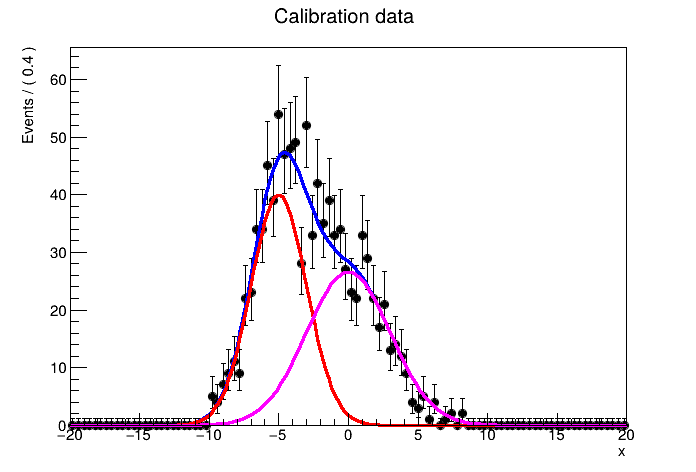

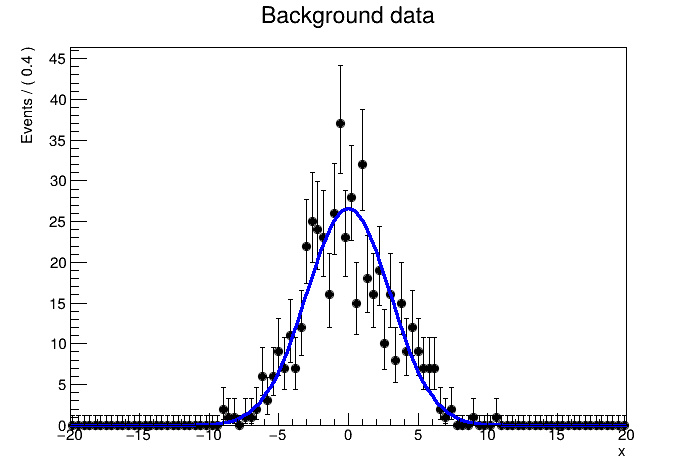

In [24]:

# Setup the model for the calibration data
x = ROOT.RooRealVar("x", "x", -20, 20)

mean11 = ROOT.RooRealVar("#mu11", "#mu_11", -5, -20, 20)
sigma_g11 = ROOT.RooRealVar("#sigma11", "#sigma1", 2,1,10)
g11 = ROOT.RooGaussian("g11", "g11", x, mean11, sigma_g11)

mean12 = ROOT.RooRealVar("#mu12", "#mu_12", 0, -20, 20)
sigma_g12 = ROOT.RooRealVar("#sigma12", "#sigma12", 3,1,10)
g12 = ROOT.RooGaussian("g12", "g12", x, mean12, sigma_g12)

frac = ROOT.RooRealVar("#lambda", "#lambda", 0.5, 0.0, 1.0)
# Check the equation above. Coefficients in the sum are assigned to have a PDF finally.
pdf_calib = ROOT.RooAddPdf("calib", "calib", [g11, g12], [frac])

data_calib = pdf_calib.generate({x},1000,Name='data1')
nll_calib = pdf_calib.createNLL(data_calib)

frame = make_frame(x,data_calib,pdf_calib)
pdf_calib.plotOn(frame, 
                 Components=f'g11', # choose a component of the model to draw using the name
                 LineColor=ROOT.kRed, 
                )

pdf_calib.plotOn(frame, 
                 Components=f'g12', # choose a component of the model to draw using the name
                 LineColor=ROOT.kMagenta)
frame.SetTitle('Calibration data')
make_plot(frame)




# Setup the model for the background data
# y = ROOT.RooRealVar("y", "y", -20, 20)

# mean2 = ROOT.RooRealVar("#mu2", "#mu2", 0, -20, 20)
# sigma_g2 = ROOT.RooRealVar("#sigma2", "#sigma2", 3) *** No I don't use this!
# I use the width from what I used to model the Calibration data
g2 = ROOT.RooGaussian("bg", "bg", x, mean12, sigma_g12)

data2 = g2.generate({x},500,Name='data2')
nll_bg = g2.createNLL(data2,Name='bg')

frame = make_frame(x,data2,g2)
frame.SetTitle('Background data')
make_plot(frame)

total_nll = ROOT.RooAddition("total_nll", "total_nll", [nll_calib,nll_bg])

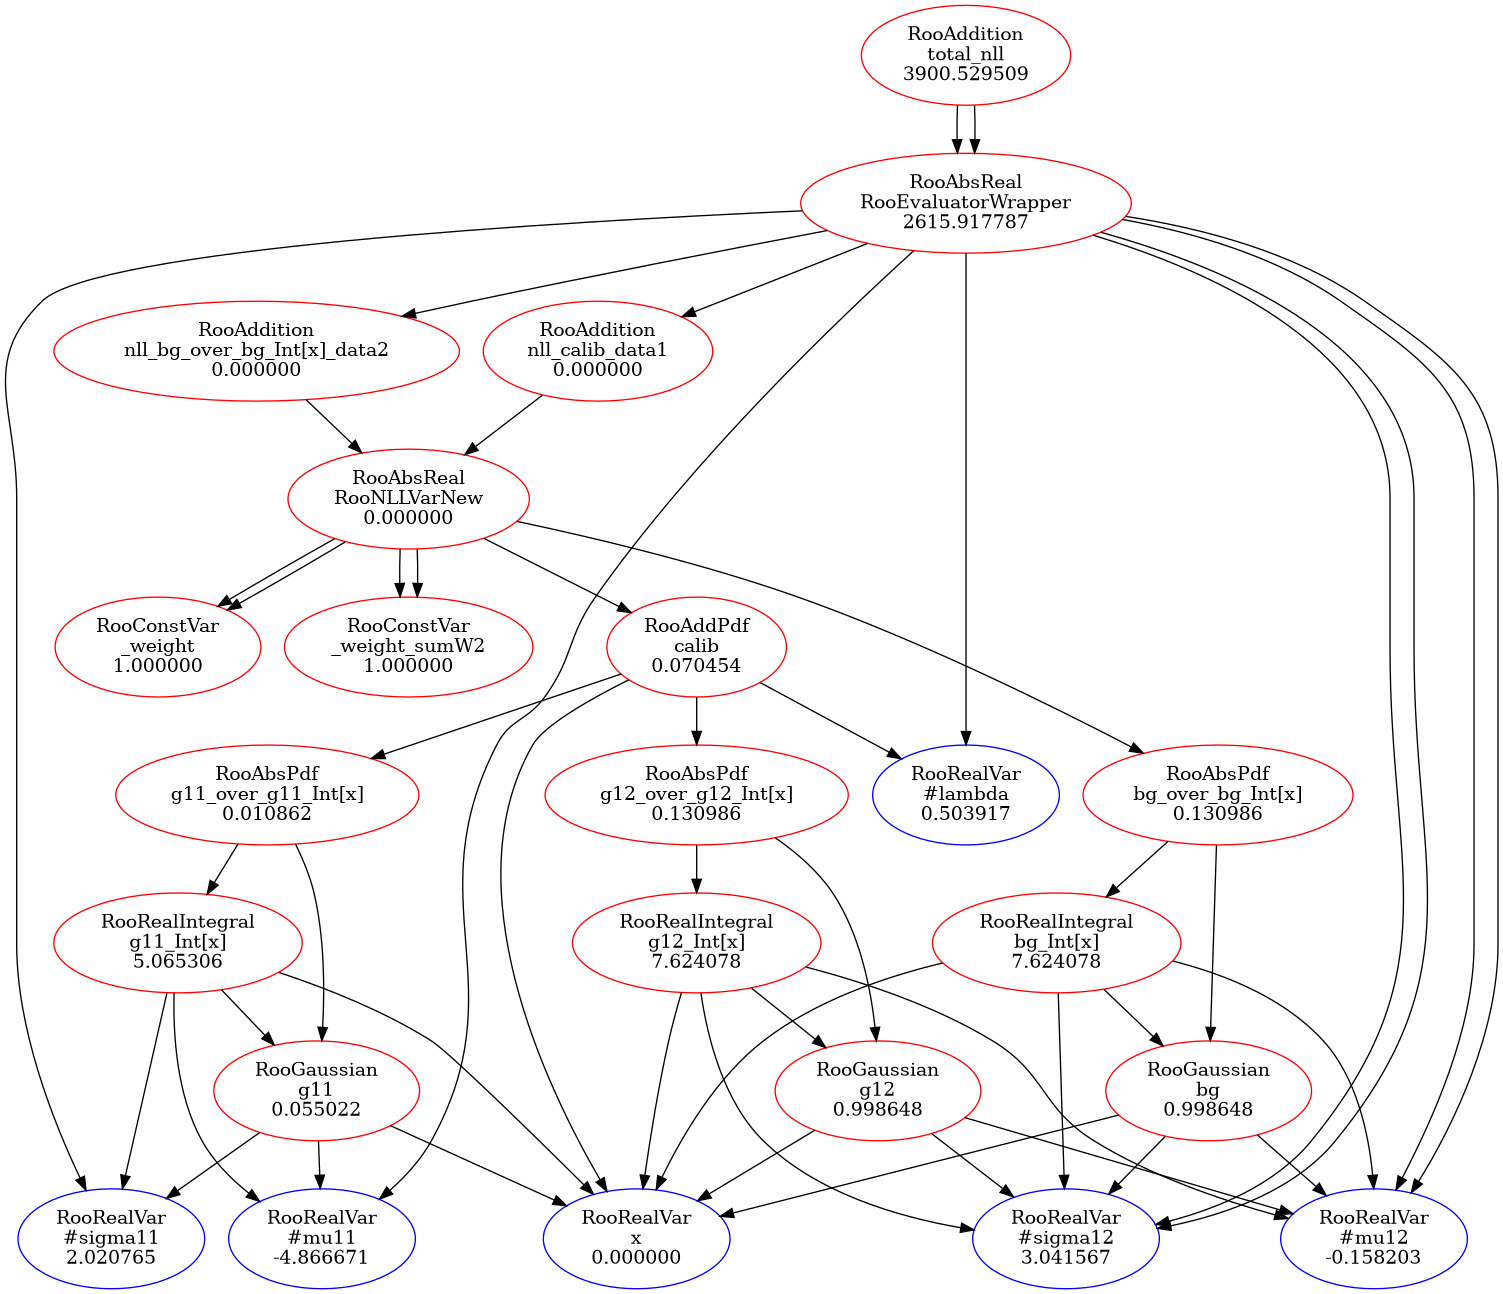

In [37]:
# Let's see the structure of the model.
# This command produces a .dot file that can be visualized.
total_nll.graphVizTree('total_nll.dot')

# don't care about this part for know
!dot -Tpng total_nll.dot -o Model_graph.png 
!unflatten  -l 1 total_nll.dot | dot -Tpng -o file.png #number of of layers

from IPython.display import Image
Image(filename='Model_graph.png')

[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_calib_data1) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 2614.37114437859782
Edm   = 4.90769830679497129e-05
Nfcn  = 126
#lambda	  = 0.480216	 +/-  0.0992644	(limited)
#mu11	  = -5.01815	 +/-  0.298039	(limited)
#mu12	  = -0.323119	 +/-  0.657642	(limited)
#sigma11	  = 1.94366	 +/-  0.154653	(limited)
#sigma12	  = 2.87671	 +/-  0.280002	(limited)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(total_nll) Summation contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 3900.5295090721811
Edm   = 0.000126169494963736966
Nfcn  = 112
#lambda	  = 0.503917	 +/-  0.0344436	(limited)
#mu11	  = -4.86667	 +/-  0.174691	(limited)
#mu12	  = -0.158203	 +/-  0.129022	(limite

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       2617.138031 Edm =       4.332172255 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 2617.138031
  Edm           : 4.332172255
  Internal parameters:	[                0    -0.2526802551                0    -0.8911225079    -0.5890309702]	
  Internal gradient  :	[     -5.750677637       -170.93582      217.2880854      11.96690073      57.16647918]	
  Internal covariance matrix:
[[   0.0036923456              0              0              0              0]
 [              0  6.6403363e-05              0              0              0]
 [              0              0   0.0001459461              0              0]
 [              0              0              0   0.0017266391              0]
 [              0              0              0              0   0.0024872524]]]
Info in <Minuit2>: VariableMetricBuilde

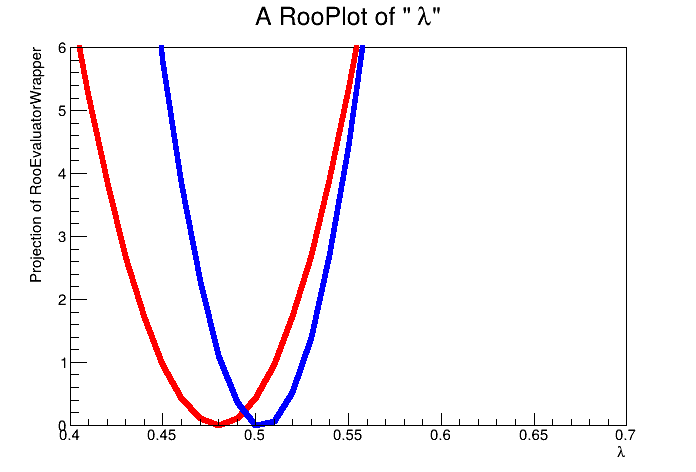

In [26]:
m = ROOT.RooMinimizer(nll_calib)
m.migrad()

frame = make_frame(frac)

# Zeroing NLL serves as LR.
nll_calib.plotOn(frame, 
                 ShiftToZero=True, # zero the line
                 LineWidth=5, # Set the line width on the plot
                 LineColor=ROOT.kRed)

m = ROOT.RooMinimizer(total_nll)
m.migrad()

# Zeroing NLL serves as LR.
total_nll.plotOn(frame, 
                 ShiftToZero=True, # zero the line
                 LineWidth=5, # Set the line width on the plot
                 LineColor=ROOT.kBlue)


frame.SetMaximum(6)
frame.GetXaxis().SetRangeUser(0.4,0.7)
make_plot(frame)


# Turn your own function into a PDF.

In [27]:
# Feel free to ignore this cell.
# In this cell I'm just making the string for the function.

# build the compton class in advance
def step_template(x,offset,resolution):
    adjusted_x = f'({x}-{offset})/(sqrt(2.)*{resolution})'
    return f"(1.+erf({adjusted_x}))/2."    
## str template generator
def model_template(x,resolution,offset1,k,base):
    step1 = step_template(x,offset1,resolution)
    combined_step = f'{k}*{step1}+{base}'
    return combined_step

'''
For analytical integral:
check the integral with: https://www.wolframalpha.com/input?i=1%2F2+%28b+e%5E%28-%28a+-+x%29%5E2%2F%282+b%5E2%29%29+sqrt%282%2F%CF%80%29+%2B+x+%2B+%28-a+%2B+x%29+erf%28%28-a+%2B+x%29%2F%28sqrt%282%29+b%29%29%29
'''
def step_template_int(x,offset,resolution):
    adjusted_x = f'({x}-{offset})/(sqrt(2.)*{resolution})'
    n1 = f'({x}-{offset})*erf({adjusted_x})'
    n2 = f'sqrt(2./TMath::Pi())*{resolution}*TMath::Gaus({x},{offset},{resolution})'
    n3 = f'{x}'
    return f'1/2.*({n1}+{n2}+{n3})'

def model_template_int(x,resolution,offset1,k,base):
    def combined_step_int(x):
        step1_int = step_template_int(x,offset1,resolution)
        combined_step_int = f'{k}*{step1_int}+{base}*{x}'
        return combined_step_int
    
    upper, lower  = f'{x}.max(rangeName)', f'{x}.min(rangeName)'
    integral = f'({combined_step_int(upper)})-({combined_step_int(lower)})'
    return f'{x}:{integral}'

compton_names = 'x','resolution','center1','k','base'
compton_template = model_template(*compton_names)
compton_template_int = model_template_int(*compton_names)


print(f'Parameters :\n{compton_names} \n')
print(f'Function : \n{compton_template} \n')
print(f'Function integral : \n{compton_template_int} \n')

Parameters :
('x', 'resolution', 'center1', 'k', 'base') 

Function : 
k*(1.+erf((x-center1)/(sqrt(2.)*resolution)))/2.+base 

Function integral : 
x:(k*1/2.*((x.max(rangeName)-center1)*erf((x.max(rangeName)-center1)/(sqrt(2.)*resolution))+sqrt(2./TMath::Pi())*resolution*TMath::Gaus(x.max(rangeName),center1,resolution)+x.max(rangeName))+base*x.max(rangeName))-(k*1/2.*((x.min(rangeName)-center1)*erf((x.min(rangeName)-center1)/(sqrt(2.)*resolution))+sqrt(2./TMath::Pi())*resolution*TMath::Gaus(x.min(rangeName),center1,resolution)+x.min(rangeName))+base*x.min(rangeName)) 



# Now we compile the model

ROOT build the CPP files it needs to define your PDF, and compliles them.

In [28]:
import os
os.chdir("compiled_model")  # change current working directory


# define a custom class to be used for Compton PDF:
# method1: Manually build the Compton class and compile.
ROOT.RooClassFactory.makePdf(
    "Compton_1step",
    "x,resolution,center1,k,base",
    "",
    compton_template,
    True, # bool: set True and pass analytical integral expression as the last argument to makepdf!
    False,
    compton_template_int
)
ROOT.gROOT.ProcessLineSync(".x Compton_1step.cxx+")

247771776

(Compton_1step) An instance of Compton_1step.


Info in <TUnixSystem::ACLiC>: creating shared library /home/ata/cdms/Statistics_tutorial/compiled_model/./Compton_1step_cxx.so


In [29]:
ROOT.gSystem.Load('./Compton_1step_cxx.so')

1

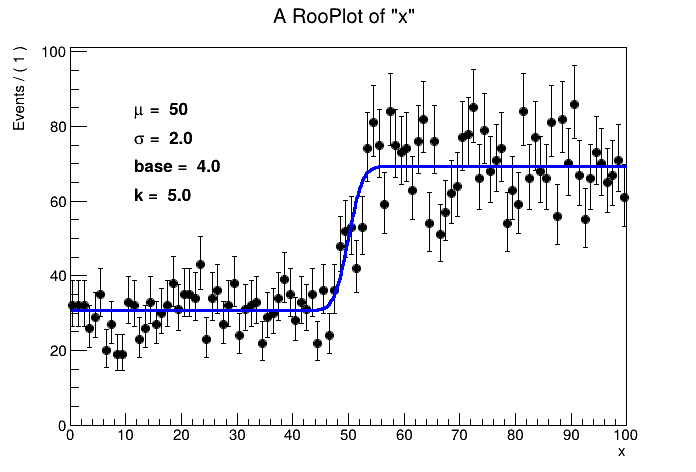

In [30]:
# As before, once the model is compliled you'll have access to it.

x = ROOT.RooRealVar("x", "x", 0, 100)

sigma = ROOT.RooRealVar("#sigma", "#sigma", 2,1,10)
step_center = ROOT.RooRealVar("#mu", "#mu", 50,1,100)
step_height = ROOT.RooRealVar("k", "k", 5,1,10)
step_base = ROOT.RooRealVar("base", "base", 4,1,10)


pdf = ROOT.Compton_1step('1step','1step',x,sigma,step_center,step_height,step_base)


data = pdf.generate({x},5000)
# pdf.fitTo(data)

frame = make_frame(x,data,pdf)

pdf.paramOn(frame,ROOT.RooFit.Layout(0.15,0.99,0.8))

make_plot(frame)

# There is no need to Compile multiple times!

Once the model is compiled, the same can be loaded in other notebook by poiting ROOT to the '.SO' files.

ROOT.gSystem.Load('./Compton_1step_cxx.so')



# There is an easier way to define a model when the model gets big

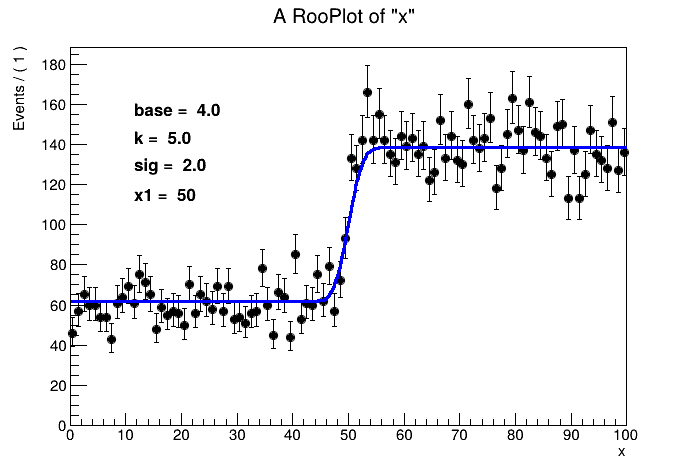

In [31]:
w = ROOT.RooWorkspace('w')
w.factory(f"Compton_1step::compton(x[0.,100.],sig[2,1,10],x1[50,1,100],k[5,1,100],base[4,1,10])")

data = w['compton'].generate({w['x']},10000)
frame = w['x'].frame()

data.plotOn(frame)
# w['compton'].fitTo(data)

frame = make_frame(w['x'],data,w['compton'])
w['compton'].paramOn(frame,ROOT.RooFit.Layout(0.15,0.99,0.8))

make_plot(frame)


In [32]:
# It is often preferred to perform Monte Carlo tests by generating pseudo-data using the PDF with random variables fixed to known values.
# Fitting the model to these pseudo-data sets should yield the value of the random variable.
# One can check whether the uncertainties are well-estimated (cover) and whether the point estimates are unbiased using a pull test.
# pull test : https://hep-physics.rockefeller.edu/luc/technical_reports/cdf5776_pulls.pdf
# RooFit provides tools to perform these tests.

mc = ROOT.RooMCStudy(
    w['compton'],
    {w['x']},
    Binned=False,
    Silence=True,
    Extended=False,
    FitOptions=dict(Save=True, PrintEvalErrors=0),
)

In [33]:
mc.generateAndFit(100,2000)

False

[#0] PROGRESS:Generation -- RooMCStudy::run: sample 99
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 98
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 97
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 96
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 95
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 94
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 93
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 92
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 91
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 90
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 89
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 88
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 87
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 86
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 85
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 84
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 83
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 82
[#0] PROGR

In [34]:

frames1 = {}
frames1[1] = mc.plotParam(w['x1'],FrameBins=40)
frames1[2] = mc.plotError(w['x1'], FrameBins=40);
frames1[3] = mc.plotPull(w['x1'], FrameBins=40,FitGauss =True)

frames2 = {}
frames2[1] = mc.plotParam(w['sig'],FrameBins=40)
frames2[2] = mc.plotError(w['sig'], FrameBins=40);
frames2[3] = mc.plotPull(w['sig'], FrameBins=40, FitGauss =True)

frame6 = mc.plotNLL(FrameBins=40)

[#1] INFO:ObjectHandling -- RooWorkspace::import() importing RooRealVar::x1pull

[#1] INFO:Fitting -- RooAbsPdf::fitTo(pullGauss_over_pullGauss_Int[x1pull]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_pullGauss_over_pullGauss_Int[x1pull]_fitParData_compton) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization
[#1] INFO:ObjectHandling -- RooWorkspace::import() importing RooRealVar::sigpull
[#1] INFO:Fitting -- RooAbsPdf::fitTo(pullGauss_over_pullGauss_Int[sigpull]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_pullGauss_over_pullGauss_Int[sigpull]_fitParData_compton) Summation contains a RooNLLVar, using its error level
[#1]

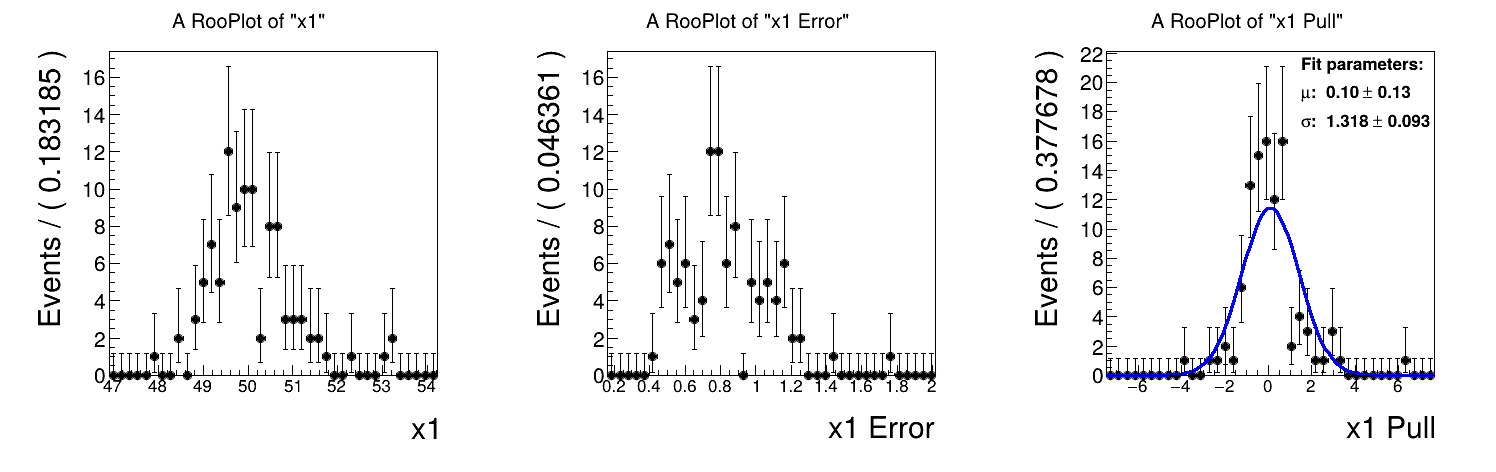

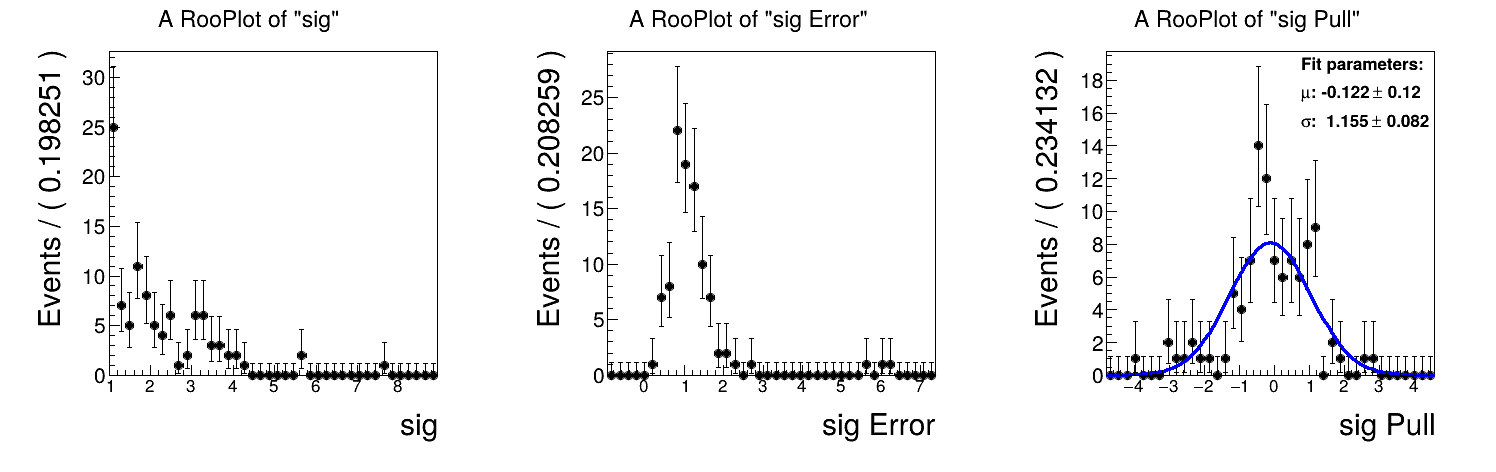

In [35]:
# gStyle->SetOptStat(0);

labels = ['x1','sig']
_cs=[]
for frame_count, frame_set in enumerate([frames1,frames2]):
    c = ROOT.TCanvas(f"mc{frame_count}", f"mc{frame_count}", 1500, 500);
    c.Divide(3, 1);
    for parameter_count in range(1,4):
        pad = c.cd(parameter_count)
        pad = c.cd(parameter_count)
        pad.SetLeftMargin(0.2)
        pad.SetBottomMargin(0.2)
        frame_set[parameter_count].Draw();
        frame_set[parameter_count].GetYaxis().SetLabelSize(0.05)
        frame_set[parameter_count].GetYaxis().SetTitleSize(0.07)

        frame_set[parameter_count].GetXaxis().SetLabelSize(0.04)
        frame_set[parameter_count].GetXaxis().SetTitleSize(0.07)

        
        frame_set[parameter_count].Draw();

    c.Draw()
    _cs.append(c)
#     c.SaveAs(f'/home/ata/cdms/hvev_compton_calibration/fit_data/fixed_k_base/fixed_k_base_{labels[frame_count]}.png')
